Troy Morgan  
Week 9 Instructor-Led Lab  
BGEN 632, Graduate Introduction to Python  
Submitted 4/21/25

Instructor-led Lab: Descriptive Statistics

# Notebook Setup

In [1]:
# load modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

In [2]:
# Set working directory
os.chdir("\\Users\\troy.morgan\\Documents\\GitHub\\week9labs/data")  # change this to your filepath
os.getcwd()  # confirm change

'C:\\Users\\troy.morgan\\Documents\\GitHub\\week9labs\\data'

In [6]:
# Load California hospital data and do a quick inspection. 
Cali_Hospital_Data = pd.read_table("CaliforniaHospitalData.csv", delimiter=',')
Cali_Hospital_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HospitalID   61 non-null     int64  
 1   Name         61 non-null     object 
 2   Zip          61 non-null     object 
 3   Website      61 non-null     object 
 4   TypeControl  61 non-null     object 
 5   Teaching     61 non-null     object 
 6   DonorType    61 non-null     object 
 7   NoFTE        61 non-null     float64
 8   NetPatRev    61 non-null     float64
 9   InOperExp    61 non-null     float64
 10  OutOperExp   61 non-null     float64
 11  OperRev      61 non-null     int64  
 12  OperInc      61 non-null     int64  
 13  AvlBeds      61 non-null     int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 6.8+ KB


In [4]:
# Load California hospital personnel data and do a quick inspection.
Cali_Hospital_Personnel = pd.read_table("CaliforniaHospitalData_Personnel.txt", delimiter='\t')
Cali_Hospital_Personnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   HospitalID     64 non-null     int64 
 1   Work_ID        64 non-null     int64 
 2   LastName       64 non-null     object
 3   FirstName      64 non-null     object
 4   Gender         64 non-null     object
 5   PositionID     64 non-null     int64 
 6   PositionTitle  64 non-null     object
 7   Compensation   64 non-null     int64 
 8   MaxTerm        64 non-null     int64 
 9   StartDate      64 non-null     object
 10  Phone          64 non-null     object
 11  Email          64 non-null     object
dtypes: int64(5), object(7)
memory usage: 6.1+ KB


## Prep Data and Add A New Record

In [10]:
# Merge the two data files and do quick inspection.
merged_CH_data = Cali_Hospital_Data.merge(Cali_Hospital_Personnel, how = 'left', on = 'HospitalID')
merged_CH_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

In [13]:
# Remove the following columns of data: `Work_ID`, `PositionID`, `Website` and quick inspection.
merged_CH_data_mod = merged_CH_data.drop(['Work_ID', 'PositionID', 'Website'], axis = 1)
merged_CH_data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   TypeControl    61 non-null     object 
 4   Teaching       61 non-null     object 
 5   DonorType      61 non-null     object 
 6   NoFTE          61 non-null     float64
 7   NetPatRev      61 non-null     float64
 8   InOperExp      61 non-null     float64
 9   OutOperExp     61 non-null     float64
 10  OperRev        61 non-null     int64  
 11  OperInc        61 non-null     int64  
 12  AvlBeds        61 non-null     int64  
 13  LastName       61 non-null     object 
 14  FirstName      61 non-null     object 
 15  Gender         61 non-null     object 
 16  PositionTitle  61 non-null     object 
 17  Compensation   61 non-null     int64  
 18  MaxTerm     

In [20]:
# Create new position for myself. I am using the same method I used in the Week 7 Independent Lab.

# Create a new DataFrame selecting an existing hospital and inspect.
new_record = pd.DataFrame(merged_CH_data_mod.iloc[[0], :])
new_record

,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,...,AvlBeds,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
0,45740,Mammoth Hospital,93546-0660,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,34916220.47,...,15,Web,David,M,Safety Inspection Member,23987,2,1/1/2012,785-532-2452,david.web@comenitymed.com


In [22]:
# Update the employee information with new information as instructed and inspect.
new_record.iloc[[0], 13:22] = ('Morgan', 'Troy', 'M', 'Safety Inspection Member', '23987', '2', '4/21/2025', '406-243-2262', 'super_rad_inspector@gmail.com')
new_record

,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,...,AvlBeds,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
0,45740,Mammoth Hospital,93546-0660,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,34916220.47,...,15,Morgan,Troy,M,Safety Inspection Member,23987,2,4/21/2025,406-243-2262,super_rad_inspector@gmail.com


In [30]:
# Concatenate merged_CH_data_mod and new_record into a new DataFrame and inspect.
CH_Data_New = pd.concat([merged_CH_data_mod, new_record], ignore_index = True)
CH_Data_New.tail()

,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,...,AvlBeds,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,1.093286e+08,...,462,Dong,HongWei,F,Safety Inspection Member,23987,2,1/1/2012,479-354-4864,hongwei.dong@brokenhealth.com
58,22460,Stanford Hospital & Clinics,94305,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,6.621559e+08,...,445,Smith,Mary,F,Safety Inspection Member,23987,2,1/1/2012,469-767-5485,mary.smith@ihc.com
59,33192,California Pacific Medical Center - Pacific Ca...,94115,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,2.960207e+08,...,730,Fourier,Craig,M,Regional Representative,46978,4,1/1/2011,503-235-4877,craig.fourier@comenitymed.com
60,38900,Cedars-Sinai Medical Center,90048,Non Profit,Teaching,Alumni,8000.0,4.662582e+06,1.285631e+09,4.616758e+08,...,909,Paanua,Kaaluai,M,Regional Representative,46978,4,1/1/2011,479-684-1883,kaaluai.paanua@brokenhealth.com
61,45740,Mammoth Hospital,93546-0660,District,Small/Rural,Charity,327.0,1.355202e+05,2.052343e+07,3.491622e+07,...,15,Morgan,Troy,M,Safety Inspection Member,23987,2,4/21/2025,406-243-2262,super_rad_inspector@gmail.com


In [31]:
#Convert any date-time columns into a datetime data type and inspect.
CH_Data_New['StartDate'] = pd.to_datetime(CH_Data_New['StartDate'])
CH_Data_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HospitalID     62 non-null     int64         
 1   Name           62 non-null     object        
 2   Zip            62 non-null     object        
 3   TypeControl    62 non-null     object        
 4   Teaching       62 non-null     object        
 5   DonorType      62 non-null     object        
 6   NoFTE          62 non-null     float64       
 7   NetPatRev      62 non-null     float64       
 8   InOperExp      62 non-null     float64       
 9   OutOperExp     62 non-null     float64       
 10  OperRev        62 non-null     int64         
 11  OperInc        62 non-null     int64         
 12  AvlBeds        62 non-null     int64         
 13  LastName       62 non-null     object        
 14  FirstName      62 non-null     object        
 15  Gender         62 non-nul

In [32]:
#Convert categorical data to the categorical data type and inspect. 
CH_Data_New['TypeControl'] = CH_Data_New['TypeControl'].astype('category')
CH_Data_New['Teaching'] = CH_Data_New['Teaching'].astype('category')
CH_Data_New['Gender'] = CH_Data_New['Gender'].astype('category')
CH_Data_New['DonorType'] = CH_Data_New['DonorType'].astype('category')
CH_Data_New['PositionTitle'] = CH_Data_New['PositionTitle'].astype('category')
CH_Data_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HospitalID     62 non-null     int64         
 1   Name           62 non-null     object        
 2   Zip            62 non-null     object        
 3   TypeControl    62 non-null     category      
 4   Teaching       62 non-null     category      
 5   DonorType      62 non-null     category      
 6   NoFTE          62 non-null     float64       
 7   NetPatRev      62 non-null     float64       
 8   InOperExp      62 non-null     float64       
 9   OutOperExp     62 non-null     float64       
 10  OperRev        62 non-null     int64         
 11  OperInc        62 non-null     int64         
 12  AvlBeds        62 non-null     int64         
 13  LastName       62 non-null     object        
 14  FirstName      62 non-null     object        
 15  Gender         62 non-nul

In [33]:
# Output the DataFrame.
CH_Data_New

,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,...,AvlBeds,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
0,45740,Mammoth Hospital,93546-0660,District,Small/Rural,Charity,327.0,1.355202e+05,2.052343e+07,3.491622e+07,...,15,Web,David,M,Safety Inspection Member,23987,2,2012-01-01,785-532-2452,david.web@comenitymed.com
1,12145,Victor Valley Community Hospital,92392,Non Profit,Small/Rural,Charity,345.0,1.361567e+05,3.344754e+07,2.034860e+07,...,99,Rodriguez,Jose,M,Regional Representative,46978,4,2009-01-01,405-744-2238,jose.rodriguez@edihealth.com
2,25667,Pioneers Memorial Hospital,92227,District,Small/Rural,Charity,601.2,1.970943e+05,3.725418e+07,3.783245e+07,...,107,Adamson,David,M,Regional Representative,46978,4,2012-01-01,785-532-7573,david.adamson@txbiomed.net
3,46996,Ridgecrest Regional Hospital,93555,Non Profit,Small/Rural,Charity,400.0,1.391704e+05,2.338557e+07,2.466136e+07,...,55,Roberts,Melissa,F,Safety Inspection Member,23987,2,2009-01-01,785-532-9779,melissa.roberts@txbiomed.net
4,37393,Barstow Community Hospital,92311,Investor,Small/Rural,Charity,262.0,1.167978e+05,1.368450e+07,1.515999e+07,...,42,Iwata,Akira,M,Regional Representative,46978,4,2011-01-01,801-611-9161,akira.iwata@hsu.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,1.093286e+08,...,462,Dong,HongWei,F,Safety Inspection Member,23987,2,2012-01-01,479-354-4864,hongwei.dong@brokenhealth.com
58,22460,Stanford Hospital & Clinics,94305,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,6.621559e+08,...,445,Smith,Mary,F,Safety Inspection Member,23987,2,2012-01-01,469-767-5485,mary.smith@ihc.com
59,33192,California Pacific Medical Center - Pacific Ca...,94115,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,2.960207e+08,...,730,Fourier,Craig,M,Regional Representative,46978,4,2011-01-01,503-235-4877,craig.fourier@comenitymed.com
60,38900,Cedars-Sinai Medical Center,90048,Non Profit,Teaching,Alumni,8000.0,4.662582e+06,1.285631e+09,4.616758e+08,...,909,Paanua,Kaaluai,M,Regional Representative,46978,4,2011-01-01,479-684-1883,kaaluai.paanua@brokenhealth.com


# Descriptive Statistics

## Summary Statistics

In [47]:
#Provide a summary of the mean, median, minimum value, and maximum value for each numeric variable. See reference. 
CH_Data_New.agg(
    {
        "NoFTE": ["mean","median", "min", "max"],
        "NetPatRev": ["mean","median", "min", "max"],
        "InOperExp": ["mean","median", "min", "max"],
        "OutOperExp": ["mean","median", "min", "max"],
        "OperRev": ["mean","median", "min", "max"],
        "OperInc": ["mean","median", "min", "max"],    
        "AvlBeds": ["mean","median", "min", "max"],
    }
)

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
mean,1333.76,6.609696e+05,1.639198e+08,8.926709e+07,2.529453e+08,-2.416488e+05,191.629032
median,368.66,1.670720e+05,3.124469e+07,3.491622e+07,6.153388e+07,1.464124e+06,99.000000
min,55.00,1.417224e+04,1.436471e+06,3.787718e+06,5.235317e+06,-3.211633e+08,12.000000
max,8000.00,4.662582e+06,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000


In [48]:
#Summarize statistics of text variables using .describe(include=['object']).
CH_Data_New.describe(include=['object'])

,Name,Zip,LastName,FirstName,Compensation,MaxTerm,Phone,Email
count,62,62,62,62,62,62,62,62
unique,61,61,24,20,5,5,25,25
top,Mammoth Hospital,93546-0660,Smith,David,46978,4,785-532-2452,david.web@comenitymed.com
freq,2,2,4,6,24,24,3,3


In [49]:
#Summarize statistics of categorical variables using .describe(include=['category'])
CH_Data_New.describe(include=['category'])

,TypeControl,Teaching,DonorType,Gender,PositionTitle
count,62,62,62,62,62
unique,4,2,2,2,4
top,Non Profit,Small/Rural,Charity,F,Regional Representative
freq,37,45,45,32,24


## Visuals

### Create histograms of the following variables: `NoFTE`, `NetPatRev`, `InOperExp`, `OutOperExp`, `OperRev`, `OperInc`, and `AvlBeds`.

<Axes: ylabel='Frequency'>

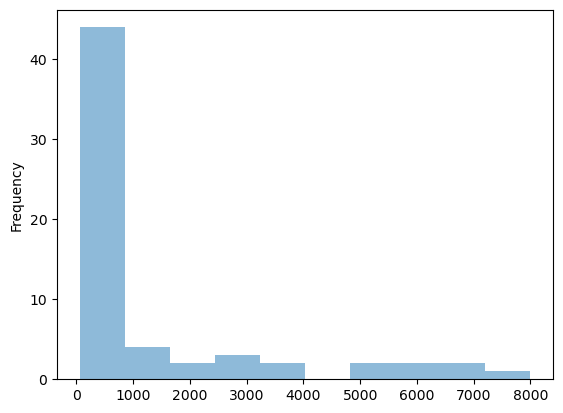

In [50]:
# Histogram for 'NoFTE'.
CH_Data_New['NoFTE'].plot.hist(alpha=0.5)

<Axes: ylabel='Frequency'>

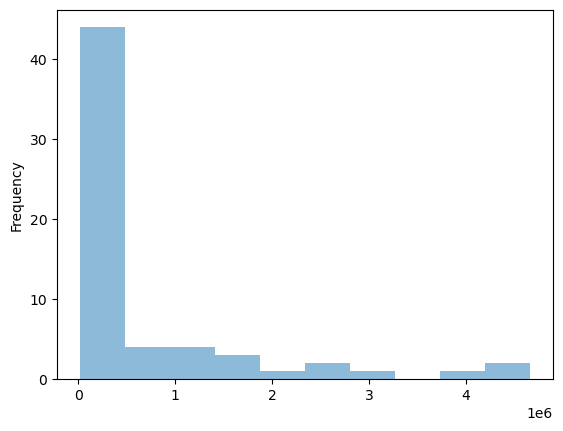

In [51]:
# Histogram for 'NetPatRev'.
CH_Data_New['NetPatRev'].plot.hist(alpha=0.5)

<Axes: ylabel='Frequency'>

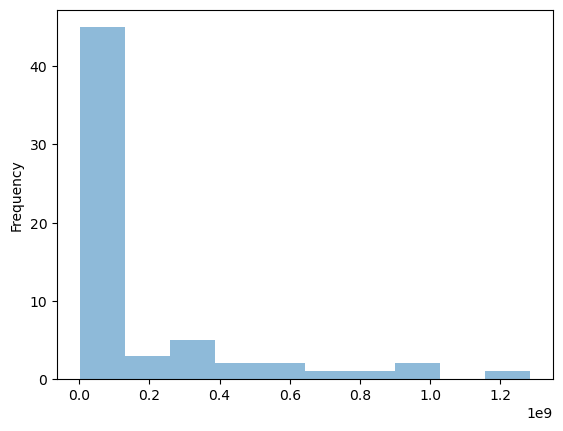

In [52]:
# Histogram for 'InOperExp'.
CH_Data_New['InOperExp'].plot.hist(alpha=0.5)

<Axes: ylabel='Frequency'>

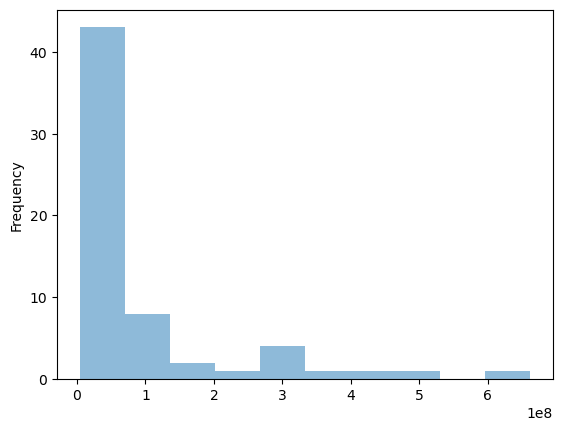

In [53]:
# Histogram for 'OutOperExp'.
CH_Data_New['OutOperExp'].plot.hist(alpha=0.5)

<Axes: ylabel='Frequency'>

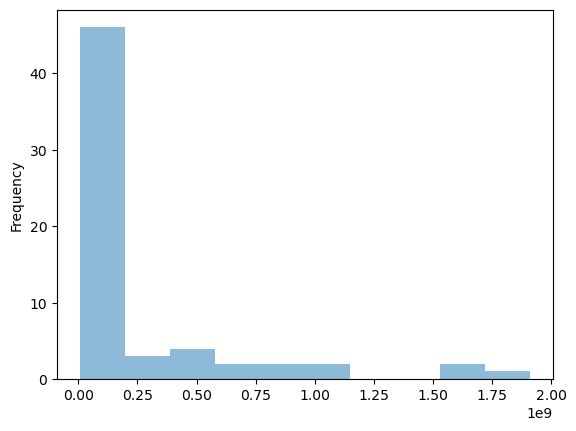

In [54]:
# Histogram for 'OperRev'.
CH_Data_New['OperRev'].plot.hist(alpha=0.5)

<Axes: ylabel='Frequency'>

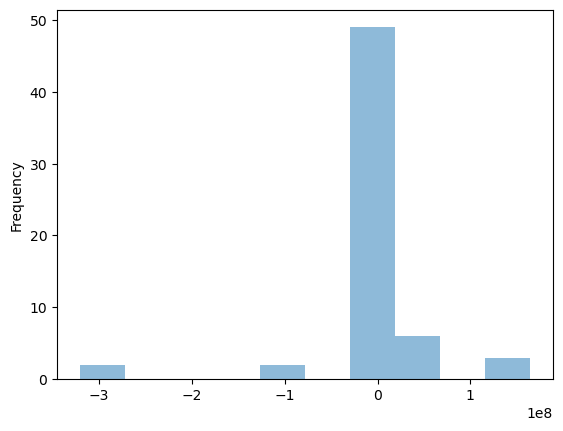

In [55]:
# Histogram for 'OperInc'.
CH_Data_New['OperInc'].plot.hist(alpha=0.5)

<Axes: ylabel='Frequency'>

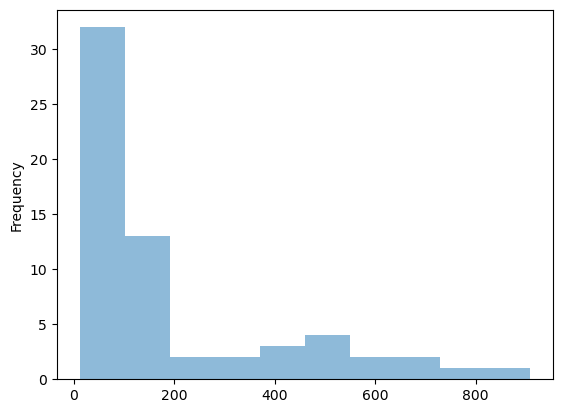

In [56]:
# Histogram for 'AvlBeds'.
CH_Data_New['AvlBeds'].plot.hist(alpha=0.5)

### Create scatterplots of the following variables using *net patient revenue* as the target variable (i.e., place it on the *y*-axis): `NoFTE`, `InOperExp`, `OutOperExp`, `OperRev`, `OperInc`, and `AvlBeds`. Describe the linearity and trend of each plot.

<Axes: xlabel='NoFTE', ylabel='NetPatRev'>

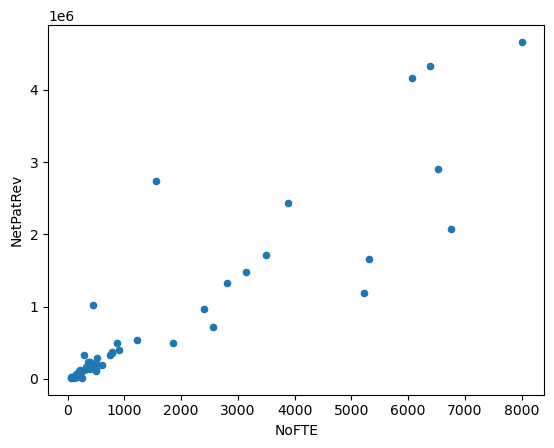

In [60]:
#Scatterplot for net patient revenue ('NetPatRev') and 'NoFTE'
CH_Data_New.plot.scatter(x='NoFTE', y='NetPatRev')

# This relationship is pretty linear with net patient revenue increasing in correlation with the number of full time employees.

<Axes: xlabel='InOperExp', ylabel='NetPatRev'>

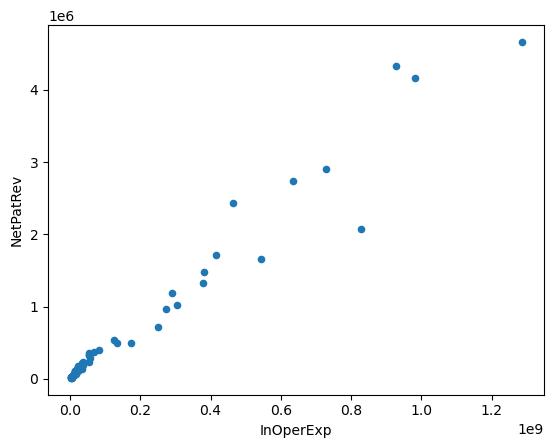

In [59]:
#Scatterplot for net patient revenue ('NetPatRev') and 'InOperExp'
CH_Data_New.plot.scatter(x='InOperExp', y='NetPatRev')

# This relationship is also pretty linear with net patient revenue increasing in correlation with the inpatient operating costs.

<Axes: xlabel='OutOperExp', ylabel='NetPatRev'>

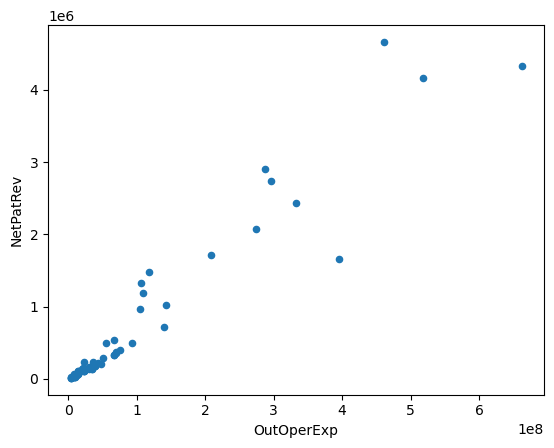

In [61]:
#Scatterplot for net patient revenue ('NetPatRev') and 'OutOperExp'
CH_Data_New.plot.scatter(x='OutOperExp', y='NetPatRev')

# This relationship is also pretty linear with net patient revenue increasing in correlation with the outpatient operating costs.

<Axes: xlabel='OperRev', ylabel='NetPatRev'>

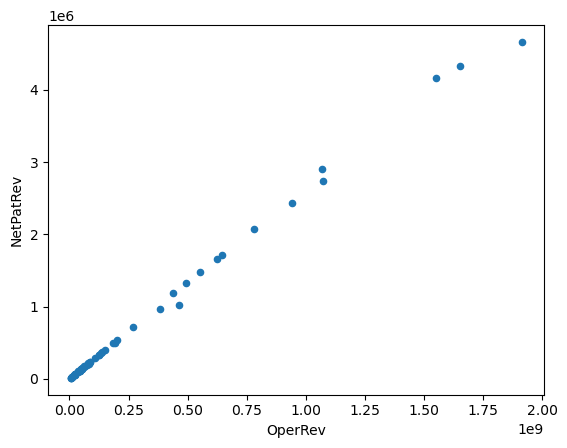

In [62]:
#Scatterplot for net patient revenue ('NetPatRev') and 'OperRev'
CH_Data_New.plot.scatter(x='OperRev', y='NetPatRev')

# This relationship is very linear with net patient revenue increasing in correlation with operating revenue.

<Axes: xlabel='OperInc', ylabel='NetPatRev'>

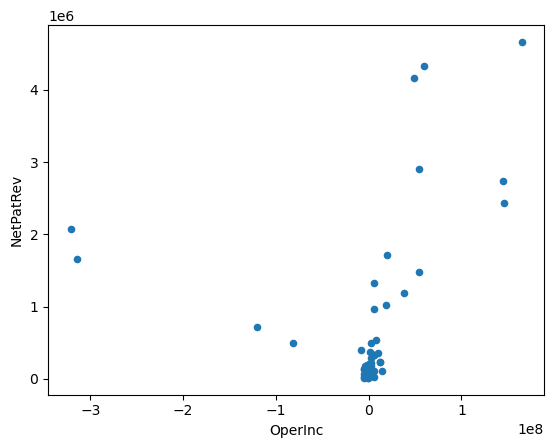

In [63]:
#Scatterplot for net patient revenue ('NetPatRev') and 'OperInc'
CH_Data_New.plot.scatter(x='OperInc', y='NetPatRev')

# This plot doesn't seem to be linear, or maby is sort of linear? Operating income (operating revenue less the operating expenses) is concentrated around zero.

<Axes: xlabel='AvlBeds', ylabel='NetPatRev'>

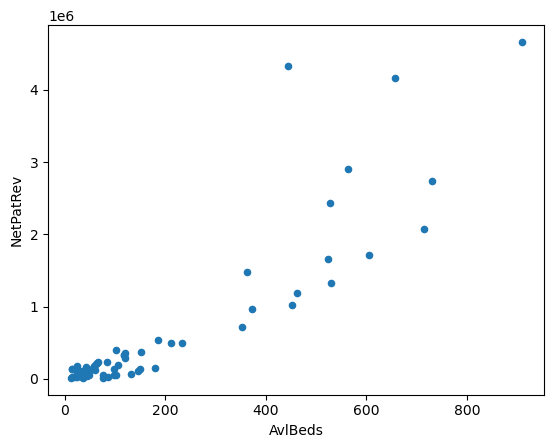

In [64]:
#Scatterplot for net patient revenue ('NetPatRev') and 'AvlBeds'
CH_Data_New.plot.scatter(x='AvlBeds', y='NetPatRev')

# This seems to be pretty linear with net patient revenue increasing in correlation to available beds. 

### Create a boxplot and assess the lack or presence of outliers for the following variables: `NoFTE`, `NetPatRev`, `InOperExp`, `OutOperExp`, `OperRev`, `OperInc`, and `AvlBeds`. You may need to split the variables up due to the range of values in the data (like we did in the tutorial).



<Axes: >

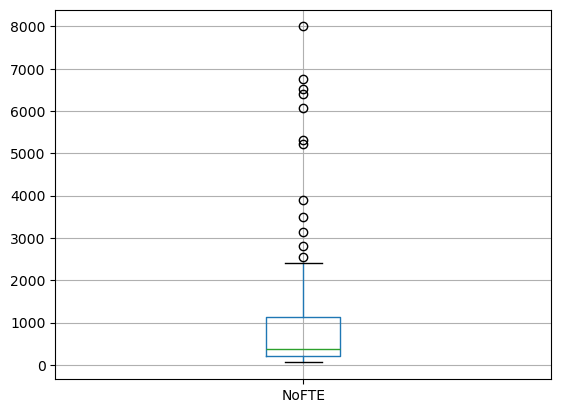

In [66]:
#Create boxplot of 'NoFTE'.
CH_Data_New.loc[:,['NoFTE']].boxplot()

# There are many outliers. 

<Axes: >

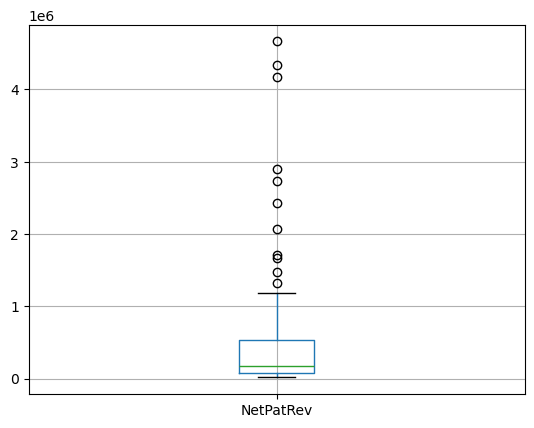

In [67]:
#Create boxplot of 'NetPatRev'.
CH_Data_New.loc[:,['NetPatRev']].boxplot()

# There are many outliers. 

<Axes: >

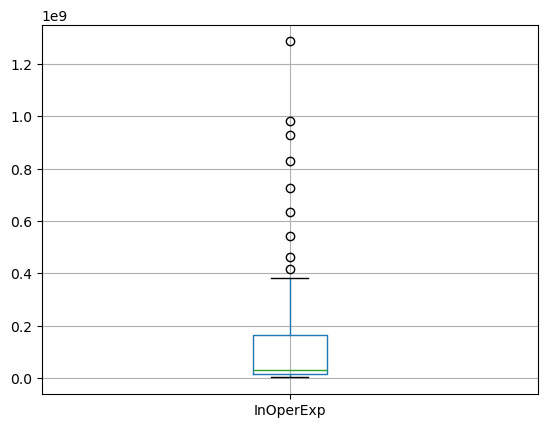

In [68]:
#Create boxplot of 'InOperExp'.
CH_Data_New.loc[:,['InOperExp']].boxplot()

# There are many outliers. 

<Axes: >

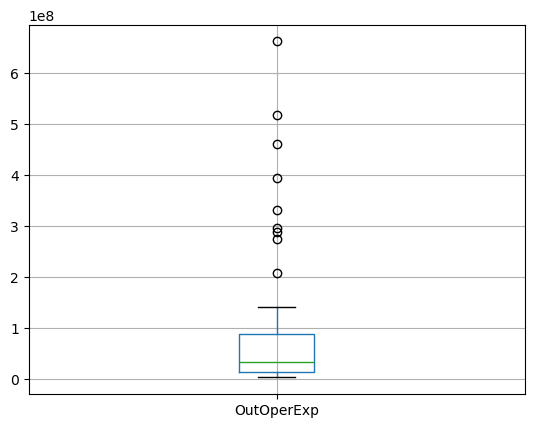

In [69]:
#Create boxplot of 'OutOperExp'.
CH_Data_New.loc[:,['OutOperExp']].boxplot()

# Again, there are many outliers. 

<Axes: >

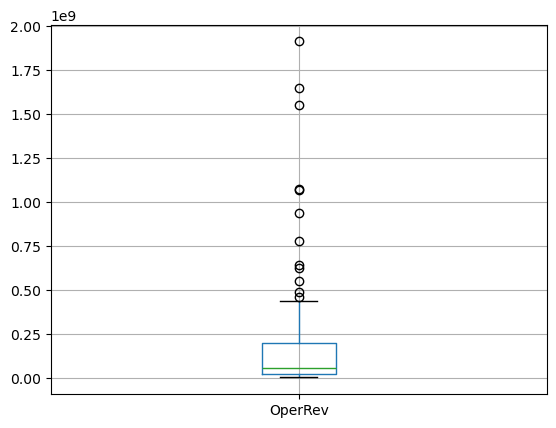

In [70]:
#Create boxplot of 'OperRev'.
CH_Data_New.loc[:,['OperRev']].boxplot()

# Again, there are many outliers. 

<Axes: >

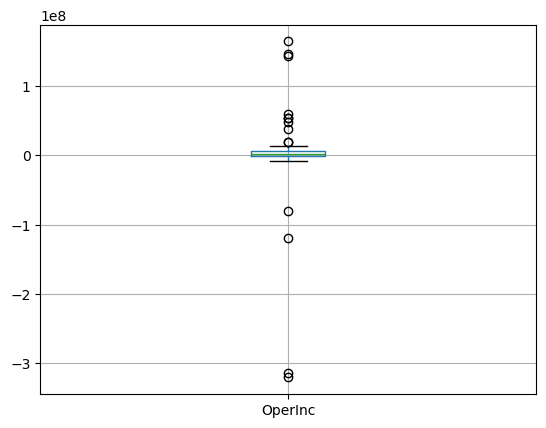

In [71]:
#Create boxplot of 'OperInc'.
CH_Data_New.loc[:,['OperInc']].boxplot()

# Again, there are many outliers. However, in this one there are both low and high outliers. 

#### Choose three variables and create a QQ plot, providing your assessment of the normality.

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([  14172.24044,   14313.04918,   17566.92896,   26260.51366,
      

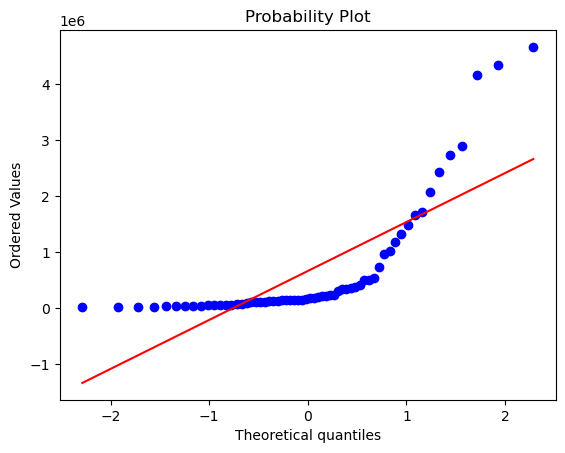

In [72]:
#Create QQ plot for net patient revenue. 
sts.probplot(CH_Data_New.NetPatRev, dist="norm", plot=plt)

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([3.78771840e+06, 3.98989430e+06, 4.18115129e+06, 4.57888755e+06,
  

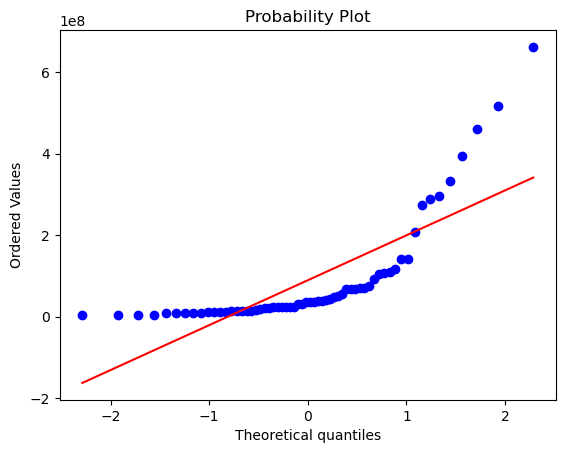

In [73]:
#Create QQ plot for outpatient operating cost. 
sts.probplot(CH_Data_New.OutOperExp, dist="norm", plot=plt)

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([-321163336, -314000601, -119949304,  -81022041,   -7850861,
      

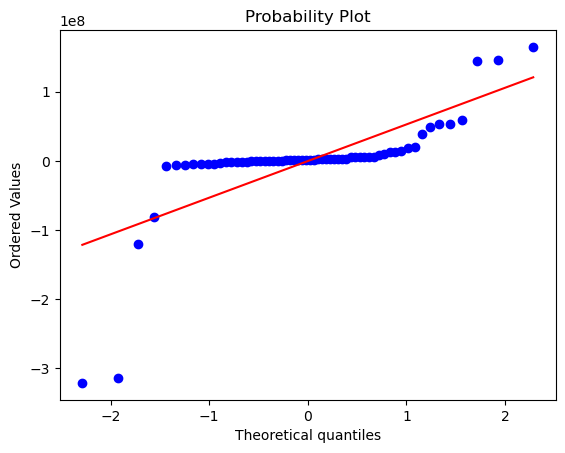

In [74]:
#Create QQ plot for operating income. 
sts.probplot(CH_Data_New.OperInc, dist="norm", plot=plt)

 #### Perform a Shapiro-Wilk test on those three variables.

In [76]:
#Perform Shapiro-Wilk test on net patient revenue. 
sts.shapiro(CH_Data_New.NetPatRev)

ShapiroResult(statistic=0.6186828386181662, pvalue=2.0093808891893378e-11)

In [77]:
#Perform Shapiro-Wilk test on outpatient operating cost. 
sts.shapiro(CH_Data_New.OutOperExp)

ShapiroResult(statistic=0.6329930117227349, pvalue=3.497133310408869e-11)

In [78]:
#Perform Shapiro-Wilk test on operating income. 
sts.shapiro(CH_Data_New.OperInc)

ShapiroResult(statistic=0.5570554433550541, pvalue=2.1506070763838443e-12)

#### Do your test results coincide with the QQ plots?

Honestly, I have no idea. But, I'm going to go ahead and say yes, I think they do conincide. The QQ plots show that that distributions are not normal. (That is, if I am interpretting them correctely. The blue dots don't match the red line?) And the pvalues in the Shapiro-Wilk tests are much higher than .05. I really wish I had taken a statistics course. 

# References

I found the syntax I used to get mean, median, min, and max here:
https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html